# Final Project
# Sang Chung, Noah Rubin, Alison Schaefer

## Intro/Background

### Import Data

In [5]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py

In [ ]:
# from sklearn.model_selection import cross_val_score,train_test_split,cross_validate
# from sklearn import tree,linear_model,svm
# from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import r2_score
# import scipy.fftpack as syfp
# from sklearn.compose import ColumnTransformer

In [ ]:
# directory (dependent on what comp being used)
# data_dir='./drive/My Drive/BMME890_MachineLearning/YZ_PilotDataTest'
data_dir ='C:/Users/nmrubin/Desktop/BMME890MachineLearningProject/GoogleDrive/ProjectData'

#import neutral position emg data
#loadmat can't work with matlab v 7.3, use h5py

#ordered by subjects 1-8
Subjects= ['LV','KH','XH','HS','RC','NR','YZ','AM']

EMG_dir = data_dir + '/EMGData/'
Force_dir = data_dir + '/ForceData/'
Spks_dir = data_dir + '/SpikeTrainsData/'
# print(Subjects)

#later -> go through all subjects
for i in range(len(Subjects)): #Subject
    Subj = Subjects[i]

#for now one subject
Subj = 'LV'



In [96]:
#load emg data
#careful, will take up ~4-8GB Memory

#NPS = Neutral/Pronated/Supinated
#IMRP = Index/Middle/Ring/Pinky

#pick sample rate for appropriate subject
if Subj == 'LV':
    EMGFs =  2.5621e+03
else:
    EMGFs =  2.0497e+03

with h5py.File(EMG_dir + Subj + '_EMGtrials.mat', 'r') as file:
    EMGNI = np.array(file['EMGNI'])
    EMGNM = np.array(file['EMGNM'])
    EMGNR = np.array(file['EMGNR'])
    EMGNP = np.array(file['EMGNP'])
    
    EMGPI = np.array(file['EMGPI'])
    EMGPM = np.array(file['EMGPM'])
    EMGPR = np.array(file['EMGPR'])
    EMGPP = np.array(file['EMGPP'])
    
    EMGSI = np.array(file['EMGSI'])
    EMGSM = np.array(file['EMGSM'])
    EMGSR = np.array(file['EMGSR'])
    EMGSP = np.array(file['EMGSP'])

In [ ]:
#load force data
#Fs = 1000 Hz
with h5py.File(Force_dir + Subj + '_Forces.mat', 'r') as file:
    ForceNI = np.array(file['ForceNItrial'])
    ForceNItime = np.array(file['ForceNItime'])
    ForceNM = np.array(file['ForceNMtrial'])
    ForceNMtime = np.array(file['ForceNMtime'])
    ForceNR = np.array(file['ForceNRtrial'])
    ForceNRtime = np.array(file['ForceNRtime'])
    ForceNP = np.array(file['ForceNPtrial'])
    ForceNPtime = np.array(file['ForceNPtime'])
    
    ForcePI = np.array(file['ForcePItrial'])
    ForcePItime = np.array(file['ForcePItime'])
    ForcePM = np.array(file['ForcePMtrial'])
    ForcePMtime = np.array(file['ForcePMtime'])
    ForcePR = np.array(file['ForcePRtrial'])
    ForcePRtime = np.array(file['ForcePRtime'])
    ForcePP = np.array(file['ForcePPtrial'])
    ForcePPtime = np.array(file['ForcePPtime'])
    
    ForceSI = np.array(file['ForceSItrial'])
    ForceSItime = np.array(file['ForceSItime'])
    ForceSM = np.array(file['ForceSMtrial'])
    ForceSMtime = np.array(file['ForceSMtime'])
    ForceSR = np.array(file['ForceSRtrial'])
    ForceSRtime = np.array(file['ForceSRtime'])
    ForceSP = np.array(file['ForceSPtrial'])
    ForceSPtime = np.array(file['ForceSPtime'])

In [63]:
#load spiketrain data

#SpkTrn_PostureDecomposed_PostureforTrial_Finger
#e.g. SpkTrnNSI = Neutral MUs, Supinated Trial, Index Finger
#e.g. SpkTrnPPM = Pronated MUs, Pronated Trial, Middle Finger

#compare Neutral MUs against MUs decomposed in Pronated/Supinated positions

with h5py.File(Spks_dir + Subj + '_MUsyncscompiled.mat', 'r') as file:
    
    SpkTrnNNI = np.array(file['SpkTrnNNI'])
    SpkTrnNNM = np.array(file['SpkTrnNNM'])
    SpkTrnNNR = np.array(file['SpkTrnNNR'])
    SpkTrnNNP = np.array(file['SpkTrnNNP'])
    
    SpkTrnNPI = np.array(file['SpkTrnNPI'])
    SpkTrnNPM = np.array(file['SpkTrnNPM'])
    SpkTrnNPR = np.array(file['SpkTrnNPR'])
    SpkTrnNPP = np.array(file['SpkTrnNPP'])
    
    SpkTrnNSI = np.array(file['SpkTrnNSI'])
    SpkTrnNSM = np.array(file['SpkTrnNSM'])
    SpkTrnNSR = np.array(file['SpkTrnNSR'])
    SpkTrnNSP = np.array(file['SpkTrnNSP'])
      
#     SpkTrnPNI = np.array(file['SpkTrnPNI'])
#     SpkTrnPNM = np.array(file['SpkTrnPNM'])
#     SpkTrnPNR = np.array(file['SpkTrnPNR'])
#     SpkTrnPNP = np.array(file['SpkTrnPNP'])
    
    SpkTrnPPI = np.array(file['SpkTrnPPI'])
    SpkTrnPPM = np.array(file['SpkTrnPPM'])
    SpkTrnPPR = np.array(file['SpkTrnPPR'])
    SpkTrnPPP = np.array(file['SpkTrnPPP'])
    
#     SpkTrnPSI = np.array(file['SpkTrnPSI'])
#     SpkTrnPSM = np.array(file['SpkTrnPSM'])
#     SpkTrnPSR = np.array(file['SpkTrnPSR'])
#     SpkTrnPSP = np.array(file['SpkTrnPSP'])

#     SpkTrnSNI = np.array(file['SpkTrnSNI'])
#     SpkTrnSNM = np.array(file['SpkTrnSNM'])
#     SpkTrnSNR = np.array(file['SpkTrnSNR'])
#     SpkTrnSNP = np.array(file['SpkTrnSNP'])
    
#     SpkTrnSPI = np.array(file['SpkTrnSPI'])
#     SpkTrnSPM = np.array(file['SpkTrnSPM'])
#     SpkTrnSPR = np.array(file['SpkTrnSPR'])
#     SpkTrnSPP = np.array(file['SpkTrnSPP'])
    
    SpkTrnSSI = np.array(file['SpkTrnSSI'])
    SpkTrnSSM = np.array(file['SpkTrnSSM'])
    SpkTrnSSR = np.array(file['SpkTrnSSR'])
    SpkTrnSSP = np.array(file['SpkTrnSSP'])

In [176]:
#getting error with this
#calculate a rolling window, 500ms long incremeted by 100ms
def rolling_windows(signal,window,step,frequency):
  windowSize=round(window*frequency)  
  stepSize=round(step*frequency)
  windows=[]
  for start in np.arange(0,signal.shape[1]-windowSize+1,stepSize):
    end=start+windowSize
    windows.append(np.array(signal[:,start:end]))
    
  return windows

iwindows=rolling_windows(ichannels,.5,.1,2048)
mwindows=rolling_windows(mchannels,.5,.1,2048)

ifwindows=rolling_windows(fi.T,.5,.1,1000)[0:-2]
mfwindows=rolling_windows(fm.T,.5,.1,1000)[0:-2]

In [246]:
#redoing moving window
def rollingmean(signal,winsize,windstep,Fs):

    # number of samples in each window
    windsizeind = int(np.floor(winsize*Fs))
    signaltime = np.linspace(1/Fs,len(signal)/Fs,len(signal))

    numwins = int(np.floor(np.size(signal)/Fs/winstep))

    #average time for that window
    windtime = []
    #average signal value for that window
    windmean = []

    windtimetmp = winsize/2
    startind = 0
    for windownum in range(numwins):

        #if at end of signal, use smaller window
        if startind + windsizeind - 1 > len(signal):
            endind = len(signal)
        else:
            endind = startind + windsizeind - 1

        windmean.append(np.mean(signal[startind:startind + windsizeind - 1]))

        windtime.append(windtimetmp)
        windtimetmp = windtimetmp + winstep
        startind = startind + windsizeind

    return windtime,windmean

In [64]:
#calculate rms of each channel and retrieve channels with highest rms
#check this
def rms(matrix,axis):
  
  return np.sqrt(np.mean(matrix**2,axis=axis))

def rms_top_channels(matrix,topN):
  rmsmatrix=rms(matrix,1)
  channelInd=np.argpartition(rmsmatrix,-topN)[-topN:]
  topchannels=matrix[channelInd,:]
  return topchannels

In [295]:
#get rms values of top 85 channels
NIrms=rms_top_channels(EMGNI,85)
NMrms=rms_top_channels(EMGNM,85)
NRrms=rms_top_channels(EMGNR,85)
NPrms=rms_top_channels(EMGNP,85)
#remove number of steps corresponding to extra time from emg data
# NIrms=NIchannels[:,int((len(NIrms[0])*1/EMGFs-len(ForceNI)*1/1000)*EMGFs):]
# NMrms=NIchannels[:,int((len(NMrms[0])*1/EMGFs-len(ForceNM)*1/1000)*EMGFs):]

#convert RMS to mean of all 85 channels
NIrms = np.mean(NIrms,axis=0)
NMrms = np.mean(NMrms,axis=0)
NRrms = np.mean(NRrms,axis=0)
NPrms = np.mean(NPrms,axis=0)


#get windows of RMS data & force data before cross-correlation

#SOMETHING NOT RIGHT with this calculation till, only goes out to 
NIrmstime,NIrmswind=rollingmean(NIrms,.5,.1,EMGFs)
# NMrmswind=rollingmean(NMrms,.5,.1,EMGFs)
# NIfrcwind=rollingmean(ForceNI.T,.5,.1,1000)[0:-2]
# NMfrcwind=rollingmean(ForceNM.T,.5,.1,1000)[0:-2]

ForceFs = 1000
NIfrctime,NIfrcwind = rollingmean(ForceNI,.5,.1,ForceFs)

Cross-Correlate EMG/SpikeTrains & Force Data to account for delay

1000
1226


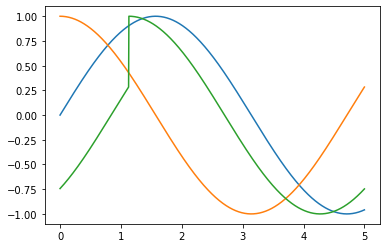

In [296]:
from scipy import signal

#test cross-correlation not working
x = np.linspace(0,5,1000)
a = np.sin(x)
b = np.cos(x)
plt.plot(x,a)
plt.plot(x,b)

# corr = signal.correlate(a,b)
lag = np.argmax(signal.correlate(a,b))
print(len(a))
print(lag)
b_new = np.roll(b, shift=int(np.ceil(lag)))
plt.plot(x,b_new)
plt.show()

PLOT: 
before-after representative cross-correlation to fix lag-time between force & and emg/SpikeTrain data

### Feature Extraction/Engineering:

In [ ]:
# ICA: already done
# PCA + K-Means
# EMG Time-Domain & Frequency Domain Features:
#     RMS
#     zero-crossings
# ANN???

PLOT: View correlations of features, remove some/etc.

### Regression of Features to Force for Prediction:

In [ ]:
# Separate out within the trial the 8 repetitions for cross-validation

In [ ]:
# For MUs:
#     Linear (try separate groups/coefficients for each MU, but also try using average Firing rate as one coefficient, what my post-doc has used)
# For EMG:
#     Linear
#     ANN
#     SVM
#     ElasticNet
#     Lasso
#     Random-Forest
#     Kernel-Reaching
#     Gradient-Boost
#     SGD Regressor

### Evaluation of Regressors:

In [ ]:
# Rather than table maybe bar chart:

# 4 Bar charts (one for each finger):
#     two sets of bars (R^2 + RMSE)
#         one bar for each model:
#             plot Mean +/- SD/SE across subjects
# sort by ranking or model??

Use Linear for MUs,
Linear + other top regressor model for comparison

### Further Analysis

Comparisons repeated-measure ANOVA?

Compare R^2/RMSE of MU regression against EMG

Compare MUs regression of Neutral vs MUs decomposed in other posture